In [ ]:
!pip install TurkishStemmer
!pip install zeyrek

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from matplotlib import pyplot as plt
import re
from collections import Counter
from TurkishStemmer import TurkishStemmer  # kok bulmak icin stemming
from snowballstemmer import stemmer        # kok bulmak icin stemming
from zeyrek import MorphAnalyzer           # kok bulmak icin lemma
import warnings
import logging

In [ ]:
# def metin_temizle(metin):
  #   metin = metin.lower()           # Tüm harfleri küçük harfe dönüştür
  #   metin = metin.replace("'", "")  # Özel karakterleri temizle
  #  metin = metin.replace(".", "")
  # metin = metin.replace(",", "")
  # metin = metin.replace("?", "")
  # metin = metin.replace("!", "")
  # metin = metin.replace('“', "")
  # metin = metin.replace("”", "")
  # metin = metin.replace("’", "")
  # metin = metin.replace('"', "")
  # metin = metin.replace("'", "")

  # return metin


def metin_temizle(metin):
    metin = re.sub(r"[.,?!“”’\"']", "", metin.lower())
    return metin

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

zeyrek = MorphAnalyzer()

textEkonomi = open("ekonomi.txt","r")
ekonomi = textEkonomi.read()
ekonomi = metin_temizle(ekonomi).split()
print(ekonomi)
# kelimelerEkonomi = zeyrek.tokenize(ekonomi)

textSpor = open("spor.txt","r")
spor = textSpor.read()
spor = metin_temizle(spor).split()
print(spor)

textSiyaset = open("siyaset.txt","r")
siyaset = textSiyaset.read()
siyaset = metin_temizle(siyaset).split()
print(siyaset)

textSecilenler = open("secilenler.txt", "r")
kelimeListesi = textSecilenler.read().split()
print(kelimeListesi)

kokKelimeListesi = [zeyrek.lemmatize(kelime)[0] for kelime in kelimeListesi]
print(kokKelimeListesi)

['dünyanın', 'önemli', 'tekstil', 'üslerinden', 'biri', 'olan', 'ülkemizin', 'ihracat', 'yaptığı', 'şirketler', 'sürdürülebilirlik', 'konusunda', 'kendi', 'yükümlülüklerini', 'yerine', 'getirme', 'hedefleri', 'doğrultusunda', 'paydaşlarının', 'da', 'iş', 'yapış', 'biçimlerini', 'etkiliyor', 'biz', 'de', 'firma', 'olarak', 'bu', 'beklentiler', 'doğrultusunda', 'dijital', 'dönüşüm', 'yolculuğumuzun', 'başından', 'bu', 'yana', 'yol', 'arkadaşımız', 'olarak', 'gördüğümüz', 'ntt', 'datanın', 'uzmanlığına', 'güvenerek', '‘microsoft', 'sustainability', 'manager', 'çözümünü', 'iş', 'süreçlerimize', 'entegre', 'ettik', 'her', 'zamanki', 'sorumlu', 'üretim', 'anlayışımızın', 'bir', 'göstergesi', 'olan', 'bu', 'dönüşüm', 'projemizin', 'türk', 'tekstil', 'sektörünün', 'sürdürülebilirlik', 'yaklaşımına', 'da', 'referans', 'olacağını', 'umuyoruz', 'özellikle', 'hayata', 'geçirdiğimiz', 'bu', 'çalışmanın', 'rekabet', 'potansiyelimizi', 'artıracağına', 've', 'ülkemiz', 'tekstil', 'sektörünün', 'gelece

{'galibiyet': 0, 'spor': 0, 'taraftar': 0, 'ihracat': 1, 'sektör': 2, 'ürün': 1, 'kurul': 0, 'parti': 0, 'kanun': 0}


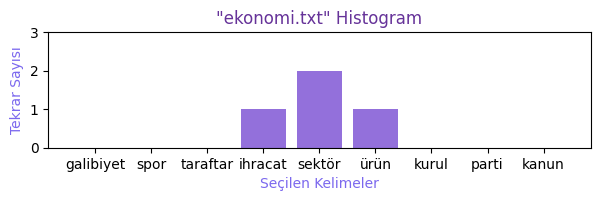

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


kokEkonomiAnaliz = [zeyrek.lemmatize(kelime)[0] for kelime in ekonomi]
bagOfWordsEkonomi = {kelime:0 for kelime in kelimeListesi}
kokler = []

for kelime, analizler in kokEkonomiAnaliz:
    # print(kelime, analizler)
    for analiz in analizler:
      if analiz in kelimeListesi:
        bagOfWordsEkonomi[analiz] += 1

print(bagOfWordsEkonomi)

# histogram
plt.figure(figsize=(7, 1.5)) # genislik ve yükseklik

kelimeler = list(bagOfWordsEkonomi.keys())
tekrarlar = list(bagOfWordsEkonomi.values())

plt.bar(kelimeler, tekrarlar, color = 'mediumpurple')
plt.xlabel('Seçilen Kelimeler', color = 'mediumslateblue')
plt.ylabel('Tekrar Sayısı', color = 'mediumslateblue')
plt.ylim(0, 3) # Y ekseninin aralığını minimum 0, maksimum 5
plt.title('"ekonomi.txt" Histogram', color = 'rebeccapurple')
plt.show()

In [ ]:
"""
kokEkonomi = kokBul.stemWords(ekonomi)
bagOfWordsEkonomi = {kelime:0 for kelime in kelimeListesi}

for kelime in kokEkonomi:
  if kelime in kokKelimeListesi:
    bagOfWordsEkonomi[kelime]+=1

# histogram
plt.figure(figsize=(7, 1.5)) # genislik ve yükseklik

kelimeler = list(bagOfWordsEkonomi.keys())
tekrarlar = list(bagOfWordsEkonomi.values())

plt.bar(kelimeler, tekrarlar, color = 'mediumpurple')
plt.xlabel('Seçilen Kelimeler', color = 'mediumslateblue')
plt.ylabel('Tekrar Sayısı', color = 'mediumslateblue')
plt.ylim(0, 3) # Y ekseninin aralığını minimum 0, maksimum 5
plt.title('"ekonomi.txt" Histogram', color = 'rebeccapurple')
plt.show()
"""

'\nkokEkonomi = kokBul.stemWords(ekonomi)\nbagOfWordsEkonomi = {kelime:0 for kelime in kelimeListesi}\n\nfor kelime in kokEkonomi:\n  if kelime in kokKelimeListesi:\n    bagOfWordsEkonomi[kelime]+=1\n\n# histogram\nplt.figure(figsize=(7, 1.5)) # genislik ve yükseklik\n\nkelimeler = list(bagOfWordsEkonomi.keys())\ntekrarlar = list(bagOfWordsEkonomi.values())\n\nplt.bar(kelimeler, tekrarlar, color = \'mediumpurple\')\nplt.xlabel(\'Seçilen Kelimeler\', color = \'mediumslateblue\')\nplt.ylabel(\'Tekrar Sayısı\', color = \'mediumslateblue\')\nplt.ylim(0, 3) # Y ekseninin aralığını minimum 0, maksimum 5\nplt.title(\'"ekonomi.txt" Histogram\', color = \'rebeccapurple\')\nplt.show()\n'

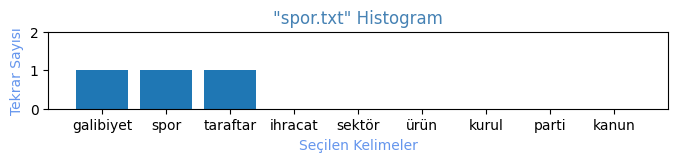

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

kokSporAnaliz = [zeyrek.lemmatize(kelime)[0] for kelime in spor]
bagOfWordsSpor = {kelime:0 for kelime in kelimeListesi}

for kelime, analizler in kokSporAnaliz:
    # print(kelime, analizler)
    for analiz in analizler:
      if analiz in kelimeListesi:
        bagOfWordsSpor[analiz] += 1

# print(bagOfWordsSpor)

# histogram
plt.figure(figsize=(8, 1)) # genislik ve yükseklik

kelimeler = list(bagOfWordsSpor.keys())
tekrarlar = list(bagOfWordsSpor.values())

plt.bar(kelimeler, tekrarlar)
plt.xlabel('Seçilen Kelimeler', color = 'cornflowerblue')
plt.ylabel('Tekrar Sayısı', color = 'cornflowerblue')
plt.ylim(0, 2) # Y ekseninin aralığını minimum 0, maksimum 5
plt.title('"spor.txt" Histogram', color = 'steelblue')
plt.show()

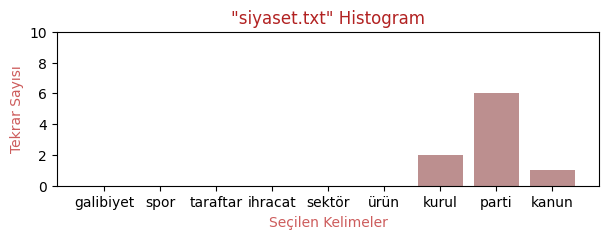

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

kokSiyasetAnaliz = [zeyrek.lemmatize(kelime)[0] for kelime in siyaset]
bagOfWordsSiyaset = {kelime: 0 for kelime in kelimeListesi}

for kelime, analizler in kokSiyasetAnaliz:
  for analiz in analizler:
    if analiz in kelimeListesi:
      bagOfWordsSiyaset[analiz] += 1


# histogram
plt.figure(figsize=(7, 2)) # genislik ve yükseklik

kelimeler = list(bagOfWordsSiyaset.keys())
tekrarlar = list(bagOfWordsSiyaset.values())

plt.bar(kelimeler, tekrarlar, color = 'rosybrown')
plt.xlabel('Seçilen Kelimeler', color = 'indianred')
plt.ylabel('Tekrar Sayısı', color = 'indianred')
plt.ylim(0, 10) # Y ekseninin aralığını minimum 0, maksimum 5
plt.title('"siyaset.txt" Histogram', color = 'firebrick')
plt.show()